In [16]:
import os
root = 'logs/'
algos = ['a2c']
games = ['beamrider']
numTrials = 1

def getLogFileNames(trialName):
    folderPath = root + trialName
    logFileNames = [fileName for fileName in os.listdir(folderPath) if 'monitor' in fileName]
    return folderPath, logFileNames
    
def getTrialStats(trialName):
    folderPath, logFileNames = getLogFileNames(trialName)
    #print(folderPath)
    
    logs = []
    for fileName in logFileNames:
        filePath = folderPath + '/' + fileName
        log_lines = []
        with open(filePath, 'r') as log_file:
            log_lines = log_file.readlines()
        logs.append(log_lines[2:])
        
    #print(logs[0][7])

    numProcesses = len(logs)
    timeSteps = []
    rewards = []
    for log in logs:
        curTimeStep = 0
        for line in log:
            lineParts = line.split(',')
            episodeReward = float(lineParts[0])
            episodeSteps = int(lineParts[1])
            episodeTime = float(lineParts[2])
            curTimeStep += episodeSteps * numProcesses
            timeSteps.append(curTimeStep)
            rewards.append(episodeReward)

    return timeSteps, rewards

In [17]:
trialNames = []
for algo in algos:
    for game in games:
        for trialNum in range(1, numTrials + 1):
            trialStr = str(trialNum)
            trialName = algo + '_' + game + '_' + trialStr
            trialNames.append(trialName)

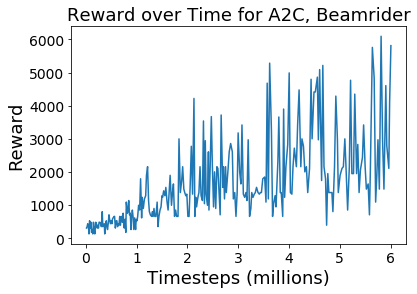

In [26]:
import matplotlib.pyplot as plt
import numpy

def running_mean(x, N):
    cumsum = numpy.cumsum(numpy.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

fig, ax = plt.subplots(1, 1)  
for i, trialName in enumerate(trialNames):
    times, rewards = getTrialStats(trialName)
    times, rewards = zip(*sorted(zip(times, rewards)))
    #rewards = running_mean(numpy.array(rewards), 32)
    ax.set_title('Reward over Time for A2C, Beamrider', fontsize=18)
    #plt.plot(times[:-31], rewards)
    ax.plot(numpy.array(times[::10]) / 1e6, rewards[::10])
    #rewards_window_10 = running_mean(numpy.array(rewards), 10)
    #plt.plot(times[:-9:10] / 1e6, rewards_window_10[::10])
    #rewards_window_25 = running_mean(numpy.array(rewards), 25)
    #plt.plot(times[:-24:10] / 1e6, rewards_window_25[::10])
    #rewards_window_50 = running_mean(numpy.array(rewards), 50)
    #plt.plot(times[:-49:10] / 1e6, rewards_window_50[::10])
    
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Timesteps (millions)', fontsize=18)
ax.set_ylabel('Reward', fontsize=18)
plt.savefig('intro_teaser.png', bbox_inches='tight')
plt.show()